# **Install and Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Download and Read Data**

In [ ]:
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-performance-factors


In [ ]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

# **EDA**

In [ ]:
df.shape

(6607, 20)

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.duplicated().sum()

np.int64(0)

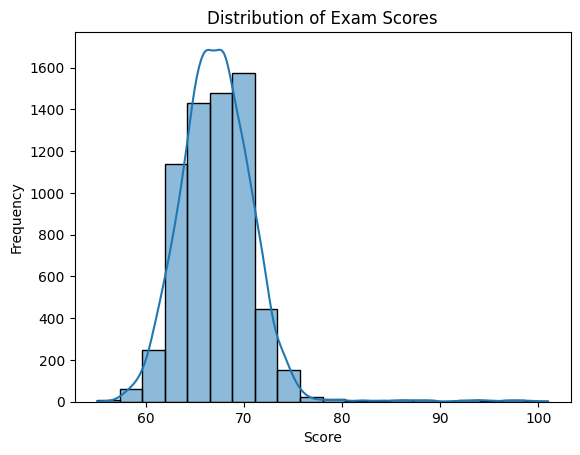

In [ ]:
# Distribution of Exam Scores
sns.histplot(df['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


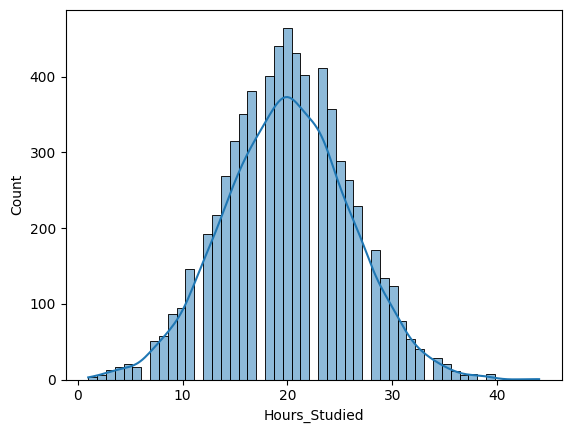

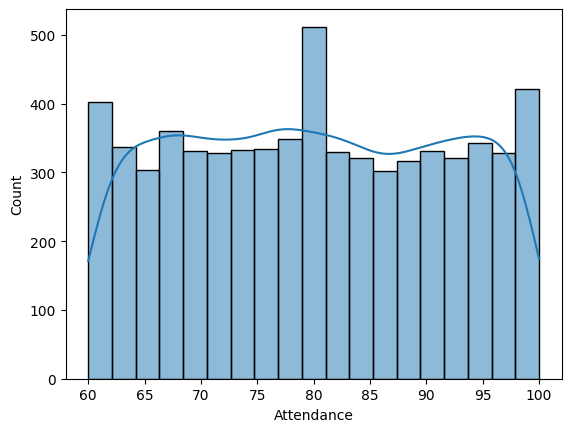

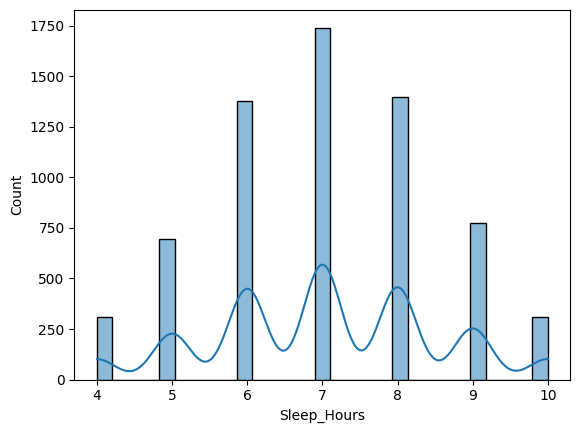

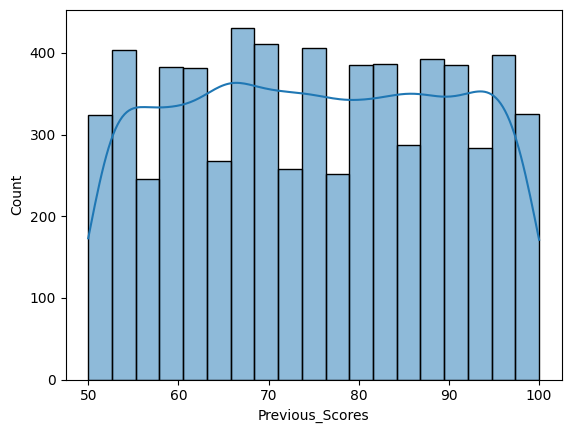

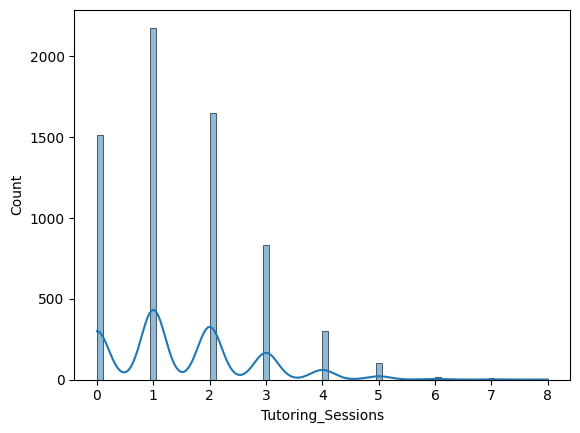

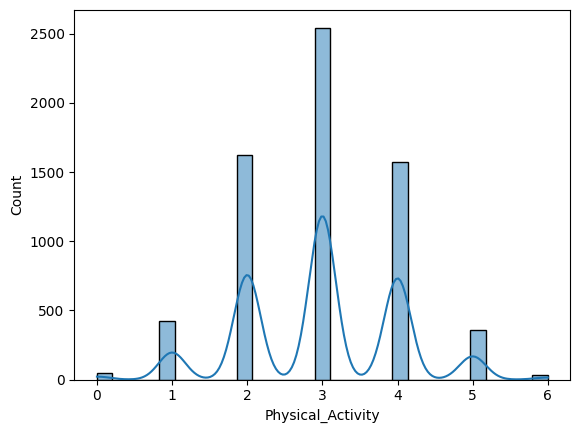

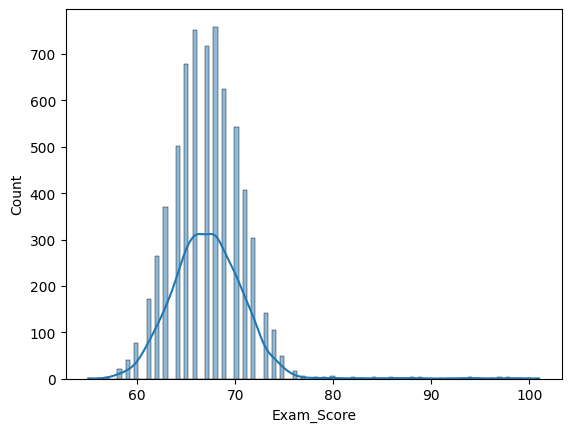

In [ ]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

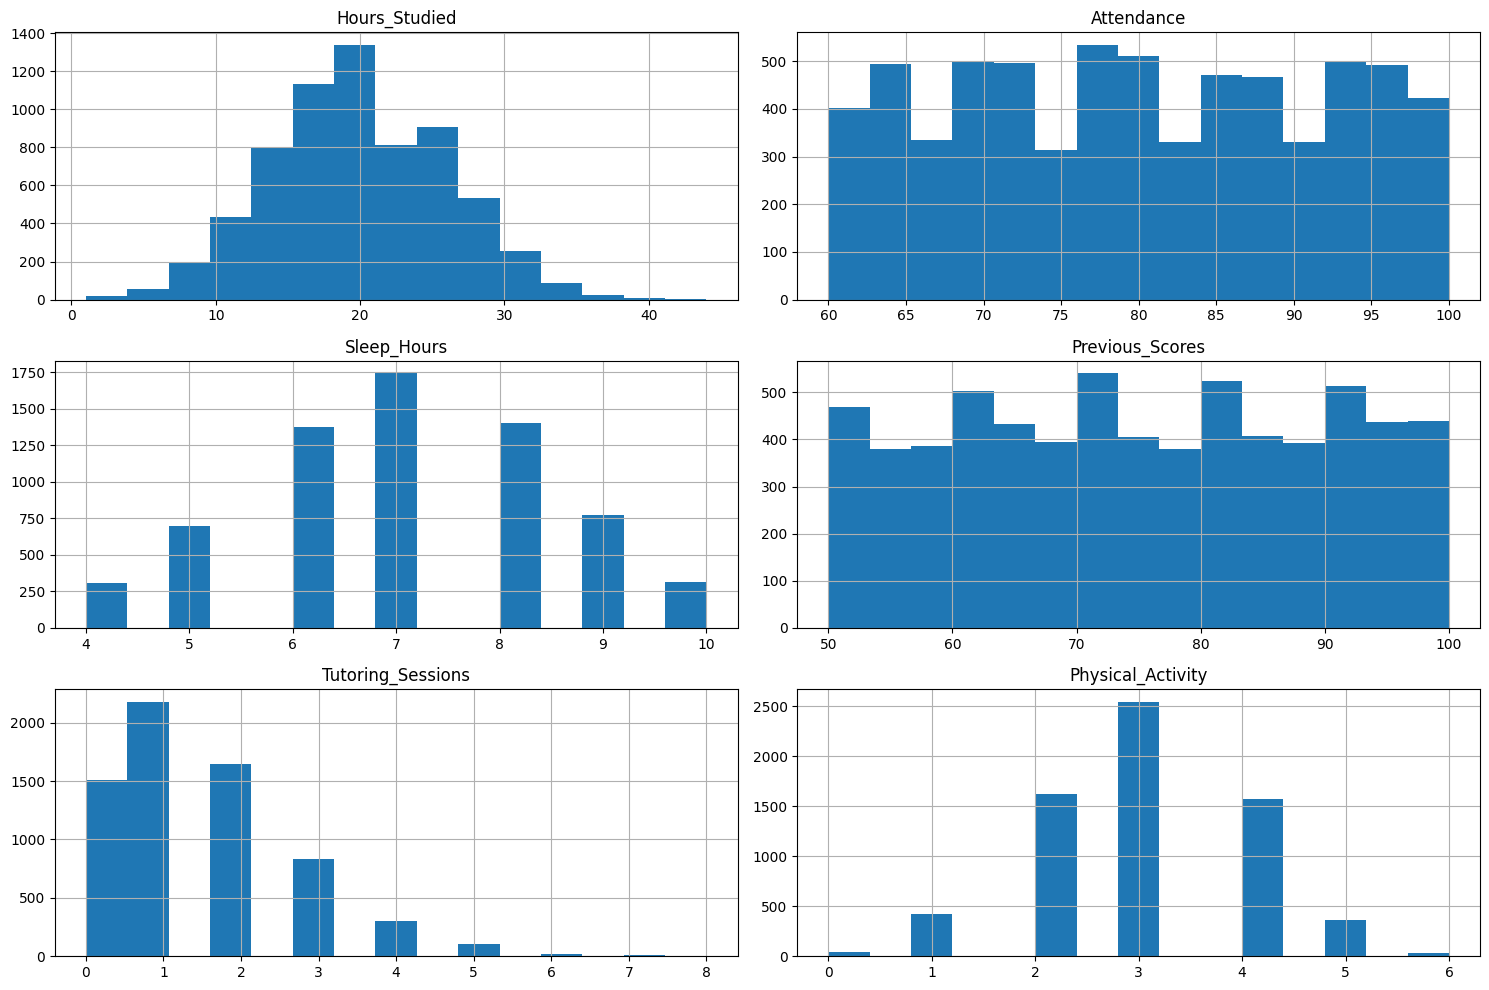

In [ ]:
# Plot histograms for numerical features
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


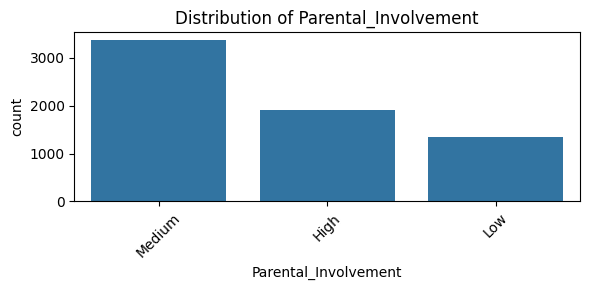

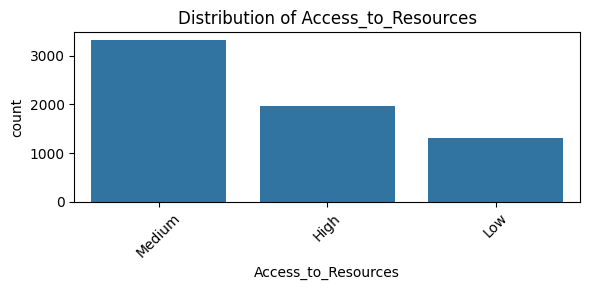

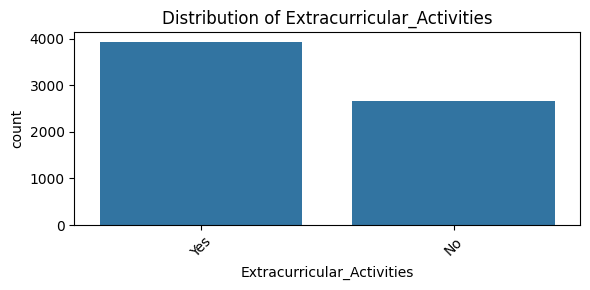

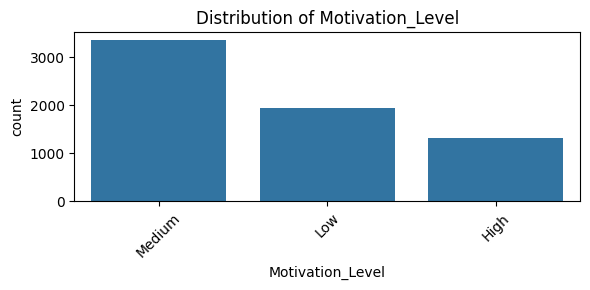

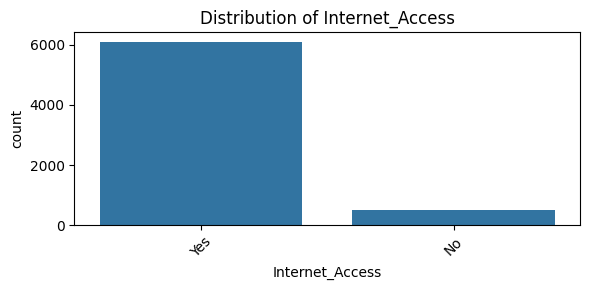

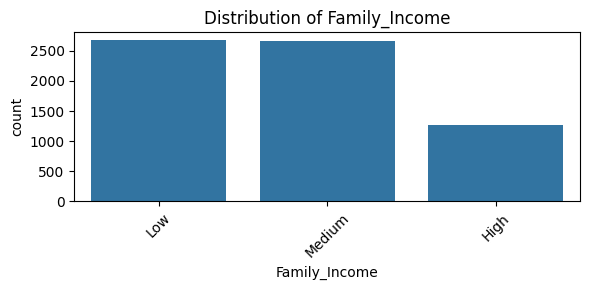

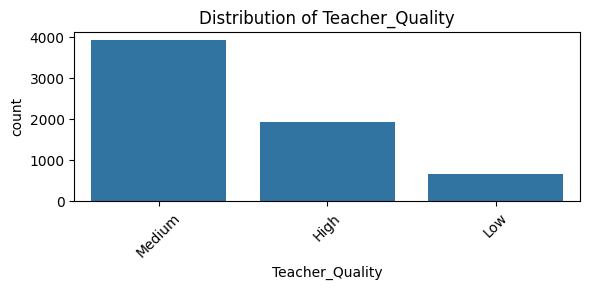

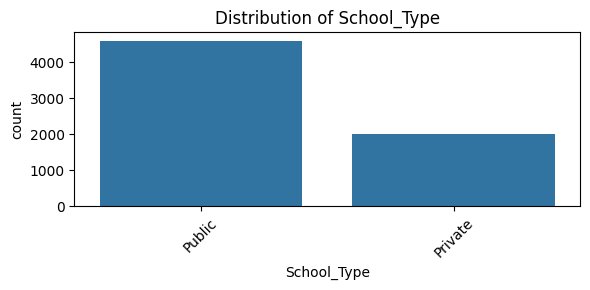

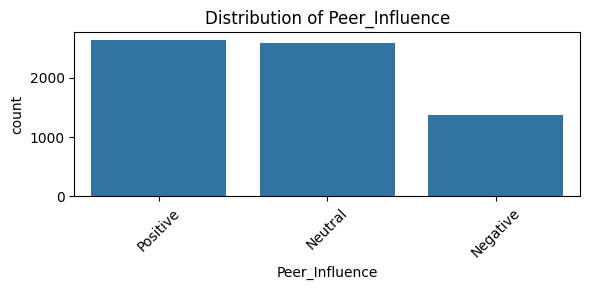

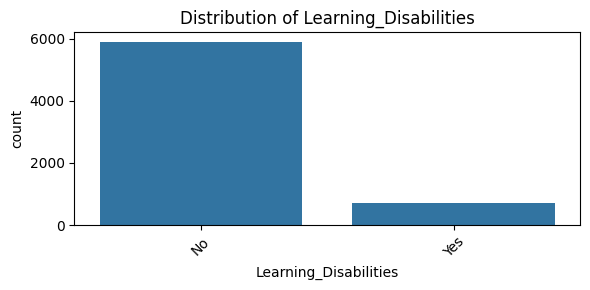

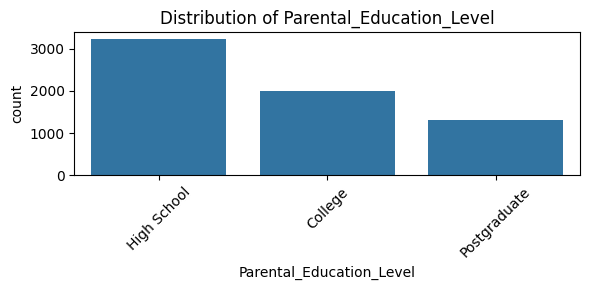

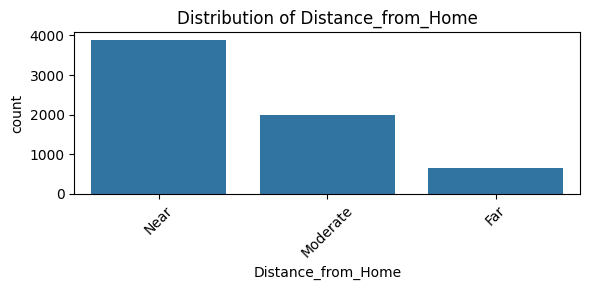

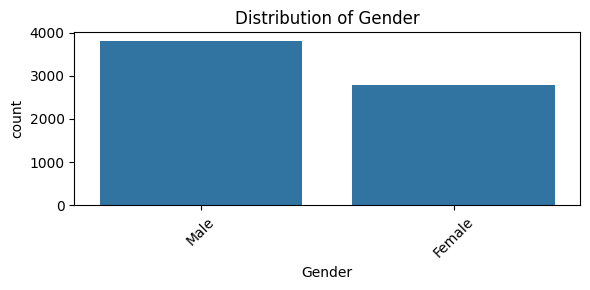

In [ ]:
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


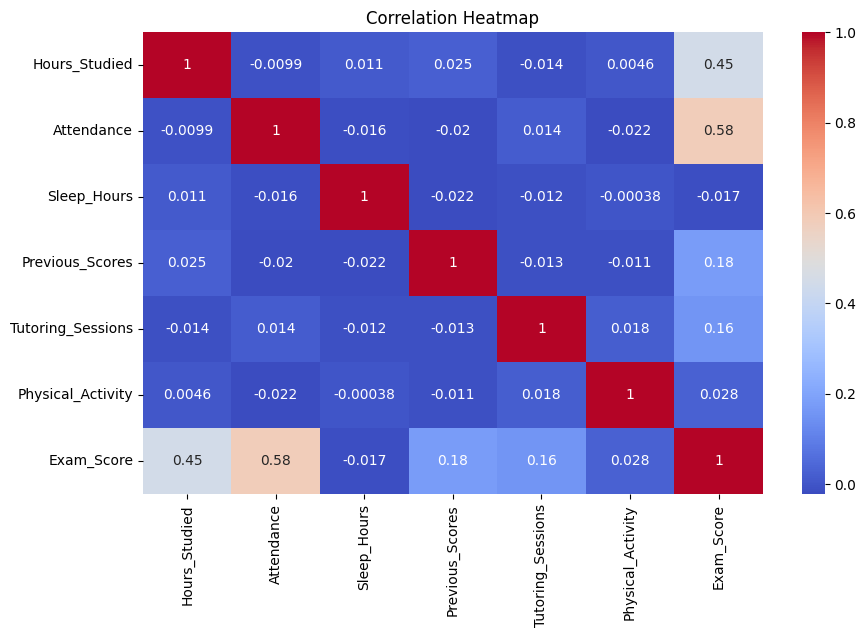

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols + ['Exam_Score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessing and Prepration**

In [ ]:
df.shape

(6607, 20)

drop missing values

In [ ]:
df.dropna(inplace=True)
df.shape

(6378, 20)

Encode Categorical cloumn

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is df
label_encoders = {}

# Identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # convert to str to handle NaN
    label_encoders[col] = le  # store encoder for later use (inverse transform if needed)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


Remove Records with Wrong values in Exam_Score >100

In [ ]:
df = df[df['Exam_Score']<=100]
df.shape

(6377, 20)

Removing outliers from dataset based on the Z-score method

In [ ]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

encoding categorical columns

In [ ]:
# Define features and label
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{model.__class__.__name__}:")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

LinearRegression:
MAE: 0.92
R-squared: 0.88


# **PolynomialRegression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

# **PolynomialRegression Evaluation**

In [ ]:
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("PolynomialRegression")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression
MAE: 0.27
R-squared: 0.99


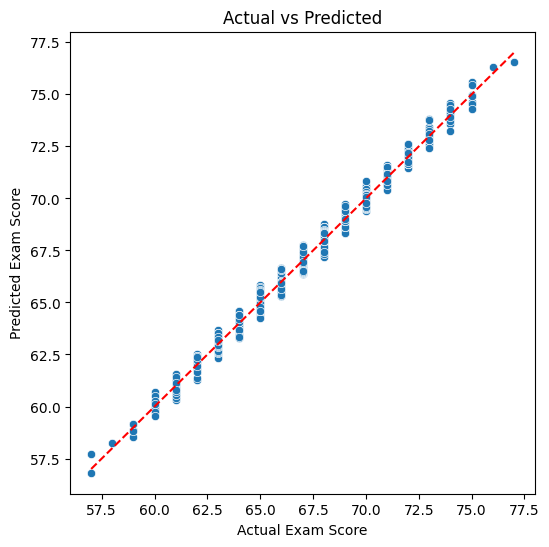

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted")
plt.show()